# Insights To Reduce Churn Rate of a FinTech Company

**Problem Statement:** 

In this study, our customer is a FinTech company that provides subscription product to their customers to manage their finances, bank accounts, educate them about ways to save money, reduce taxes, low interest loans etc. FinTech company's revenue comes through subscription of the app. They want to reduce the churn rate i.e. subscription cancellation.

**Goal:** We need to **identify behavioral patterns that act as catalyst for the disengagement of customers with the product.** This will help the company to focus on re-engaging those customers. By identifying the customers that are not happy with the features offered, company can provide more features catered towards their need in order to reduce the churn rate.

### <span style="color:blue">**This notebook will show how to select MOST IMPORTANT FEATURES to make a predictive model efficiently**</span>

In [1]:
# Importing Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%cd '/Users/sayantan/Desktop/PRACTICAL-Machine-Learning-/4.  ChrunRate_Analysis/'

/Users/sayantan/Desktop/PRACTICAL-Machine-Learning-/4.  ChrunRate_Analysis


In [2]:
dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30dataset.head()
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


**Column Description:** <br/>
`churn`: is Target- Its the latest status, whether they left the app <br/>
`housing`: 'NA'- No data; 'R'- Renting; 'O'- Own a house<br/>
`deposits`: How many time use has deposited money in their account<br/>
`withdrawal`: How many time use has withdrew money from their account<br/>
`purchases`: How many time user has purchased outside the partner (FinTech company's partner companies) companies<br/>
`purchases_partners`: How many time user has purchased within the partner (FinTech company's partner companies) companies<br/>
`cc_taken`: Whether users has taken the recommendation of the company of what type of credit card they should use<br/>
`cc_recommended`: Points based on how many time company has recommended an user a credit card<br/>
`cc_liked` & `cc_disliked`: Whether user liked or disliked the credit card recommended to them<br/>
`cc_application_begin`: Tells whether a customer has began a credit card application<br/>
`web_user`: Whether customers used the website of the company<br/>
`app_web_user`: Whether customer has used both app and website<br/>
`registered phone`: Whether customer has registered phone or not, if yes-how many (0 means 1 phone, but 5 means 5 phone)<br/>
`payment_type`: how user get paid, biweekly, weekly etc<br/>
`waiting_4_loan`: whether users has applied for loan and waiting for it to be approved<br/>
`left_for_two_month_plus`: Whether user left for 2 months or more and came back to us (if came back 1 , else 0)<br/>
`rewards_earned`: Based on good financial behavior, whether user earned some points<br/>
`is_referred`: Whether user was referred by somebody

## EDA

In [3]:
print(dataset.columns)
dataset.describe() # Distribution of Numerical Variables

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')


,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [4]:
# Removing NaN
print(dataset.isna().sum())
dataset = dataset[pd.notna(dataset['age'])] # remove 4 null values
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned']) # too many null values so removed
#dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

(26996, 29) (26996, 27) (26996, 24)


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


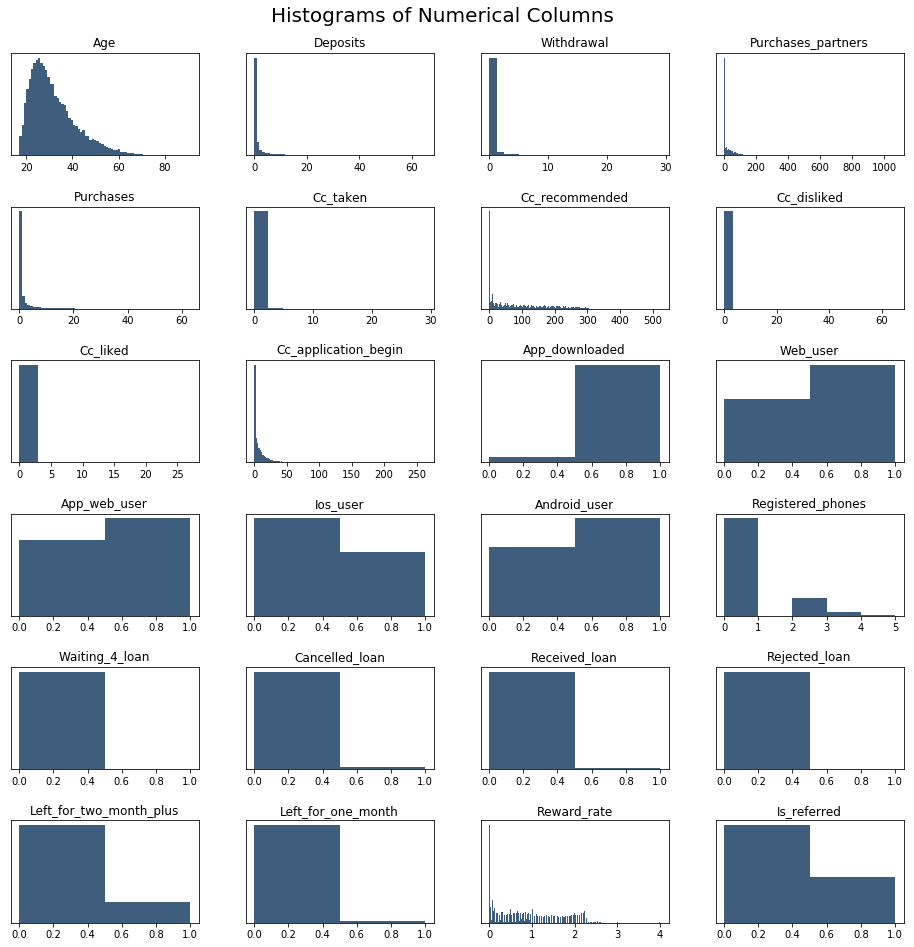

In [5]:
# Selecting only numeric columns
dataset2 = dataset.copy()
dataset2 = dataset2.drop(columns = ['user', 'churn']) # Drop target and id column
dataset_N = dataset2.select_dtypes(include='number')
#dataset2.select_dtypes(include='object').head()
print(dataset.shape, dataset2.shape, dataset_N.shape)

# Histogram of numeric columns
fig,axes = plt.subplots(6,4, figsize = (16,16), gridspec_kw={'wspace':0.25, 'hspace':0.50})
axes = axes.ravel()
st = fig.suptitle('Histograms of Numerical Columns', fontsize=20)
st.set_y(0.92)

for i in range(1, dataset_N.shape[1]+1):
    vals = np.size(dataset_N.iloc[:, i-1].unique())
    axes[i-1].hist(dataset_N.iloc[:, i-1], bins=vals, color = '#3F5D7D')
    axes[i-1].set_title(dataset_N.columns[i-1].capitalize())
    axes[i-1].get_yaxis().set_visible(False) # will remove y-ticks in case it looks crowded  
fig.tight_layout()

√ `Age` histogram shows distribution is very much right tailed. Starts at 18 years old as that is necessary to sign up for the app. Older people do not use the app service often and thats why it is right tailed.

√ `Deposits` distribution shows most people have no deposits

√ `cc_taken` distribution shows most people has not taken cc

√ `cc_recommended` distribution is evenly distributed (in comparison to other variables)

√ most people has downloaded the `app`

√ majority of people has 0 `registered_phone`. 

In [6]:
# We can select columns with less nunique value to further study them
cols = []
for col in dataset2.columns:
    if (dataset2[col].nunique()) < 6:
        cols.append(col)

Generally we can feed these cols for plotting pie chart, but here we need to work on few more columns such as zodiac sign

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


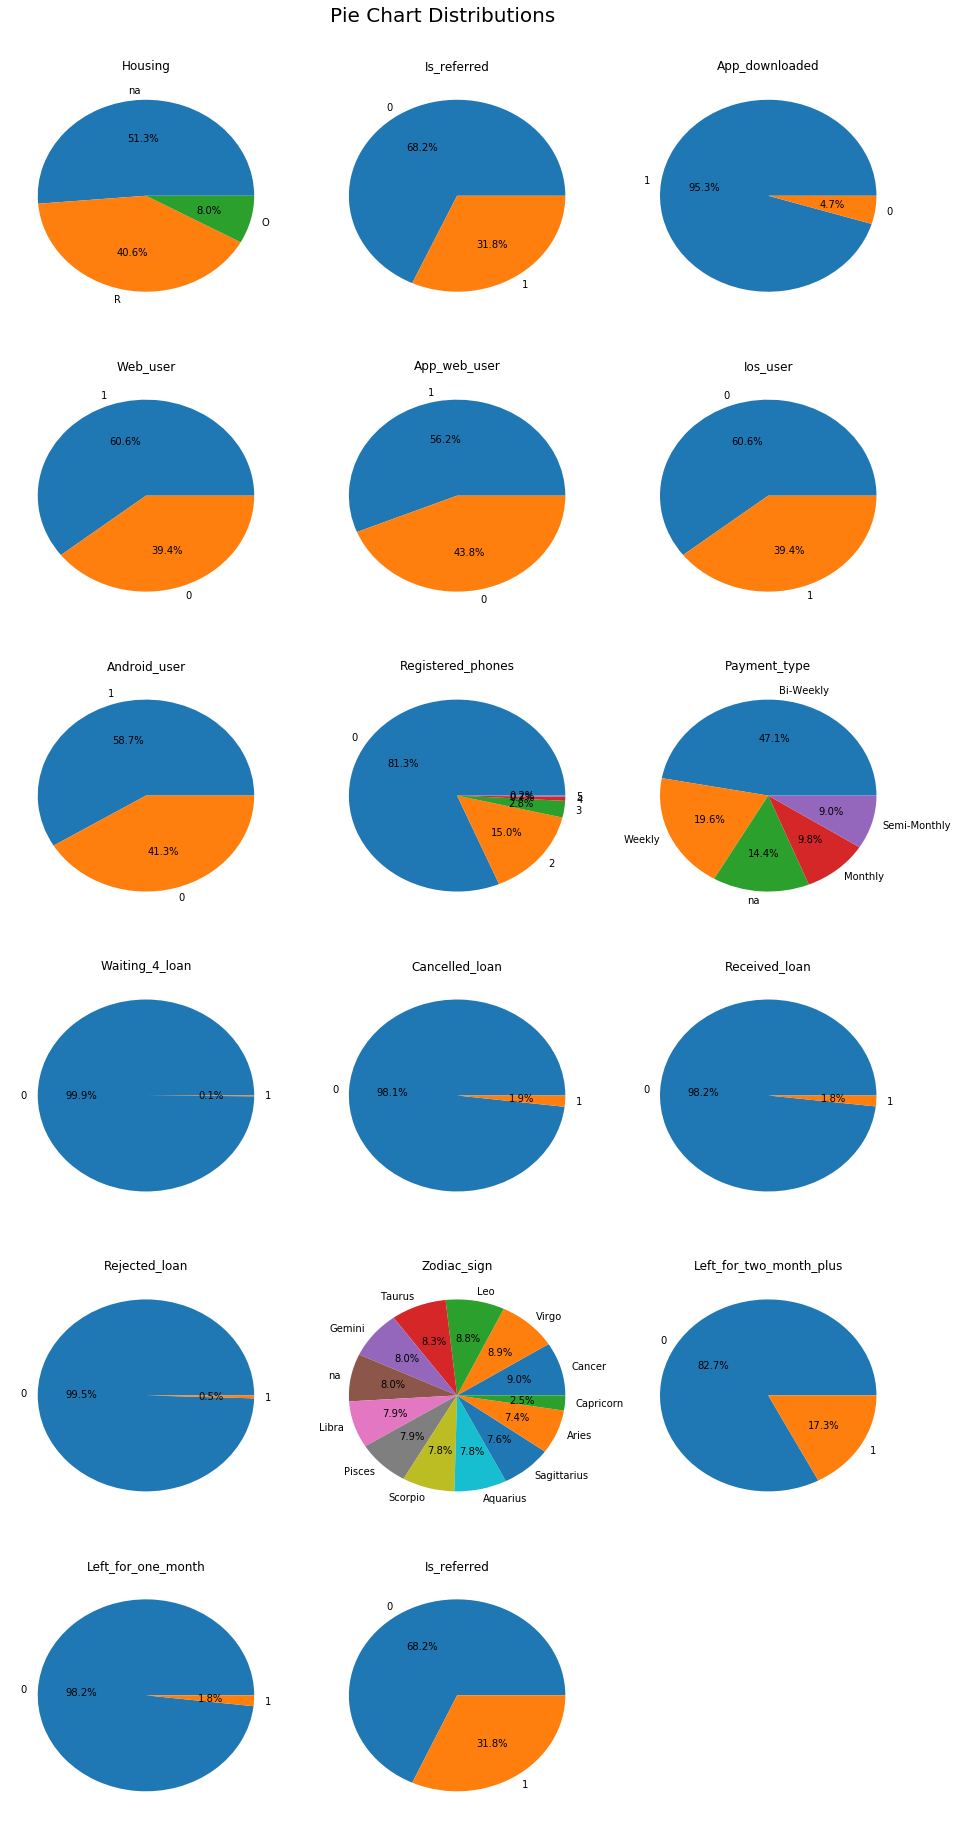

In [7]:
dataset3 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']] # all binary columns

# Pie Plots for the binary columns
fig,axes = plt.subplots(6,3, figsize = (16,32), gridspec_kw={'wspace':0.15, 'hspace':0.25})
axes = axes.ravel()
st = fig.suptitle('Pie Chart Distributions', fontsize=20)
st.set_y(0.91)

for i in range(1, dataset3.shape[1]+1):
    values = dataset3.iloc[:, i - 1].value_counts(normalize = True)
    index = values.index
    axes[i-1].pie(values, labels = index, autopct='%1.1f%%')
    axes[i-1].set_title(dataset3.columns[i-1].capitalize())
    
fig.delaxes(axes[17])
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Binary features are hard to interpret with just distribution plots. Therefore it can be also plotted in pie-charts. We do NOT want a very small subset of population in this binary variables. Most of the features are ok as the % shows they are evenly distributed.

However, if we look at `rejected_loan, left_for_one_month, waiting_4_loan, cancelled_loan, received_loan` we see one of the variable in the column is very unevely distributed (as % is like ~1) and it can cause some problems.

√ If one of the variable in the column is as little as ~1%, then that small subset of that column might not have enough occurances/observations that have both types of target variable (0,1 here). So we have to further explore to see that these columns are really useful and can be used in the model.

In [8]:
# Exploring Uneven Features w.r.t Target 
# waiting_4_loan columns has very few observations for 1, let's explore it
dataset[dataset3['waiting_4_loan'] == 1]['churn'].value_counts()

0    27
1     8
Name: churn, dtype: int64

In [9]:
dataset[dataset3.cancelled_loan == 1]['churn'].value_counts()

1    274
0    234
Name: churn, dtype: int64

In [10]:
dataset[dataset3.received_loan == 1]['churn'].value_counts()

1    292
0    199
Name: churn, dtype: int64

In [11]:
dataset[dataset3.rejected_loan == 1]['churn'].value_counts()

1    107
0     25
Name: churn, dtype: int64

In [12]:
dataset[dataset3.left_for_one_month == 1]['churn'].value_counts()

1    266
0    222
Name: churn, dtype: int64

From these, we do NOT see any feature (with very low occurances) has a very uneven bias with the Target.

Text(0.48,0.95,'Correlation with Response variable')

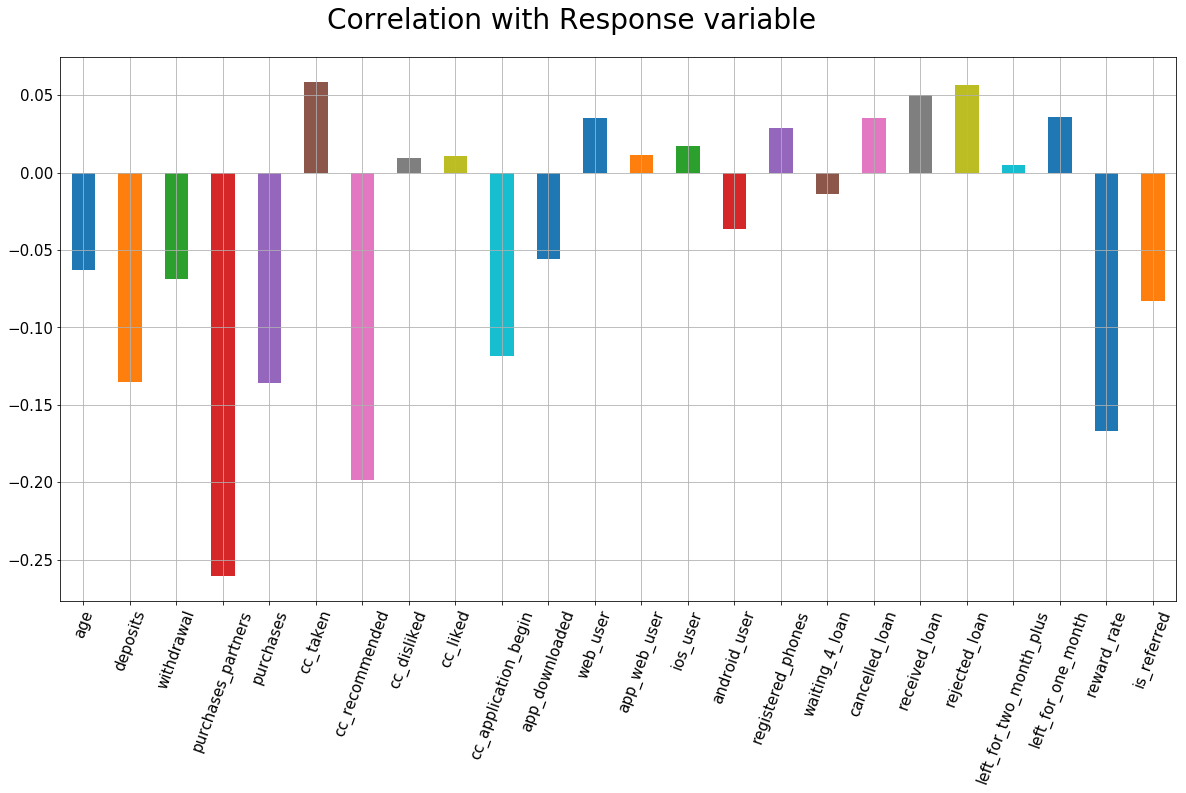

In [13]:
# Correlation with Response Variable
dataset4 = dataset.drop(columns = ['churn', 'user','housing', 'payment_type'])

# correlation with Target
dataset4.corrwith(dataset['churn']).plot.bar(figsize=(20,10), fontsize = 15, rot = 70, grid = True)                            
plt.suptitle('Correlation with Response variable', x=0.48, y=.95,fontsize=28)

Some insights from correlation plot:

`age` is -vely correlated with the target i.e. younger the age more likely the target to be 1 i.e. more likely to churn. 

`deposits` `withdrawl` `purchase_partners` is also negatively correlated means less activity (deposit, withdrawl or buying from purchase partners) one has, more likely to churn

`cc_taken` is +vely corrleated. That means people who has taken credit card based on company's recommendation are not very happy and thats why they have churn.

`cc_recommendation` less recommendation an user has, more likely to churn (that means more recommendation, less likely to churn)

`cc_Application` -vely correlated. less cc_application, leads to more churn 

`app_downloaded` less download more churn, so if someone has downloaded the app. More likely to stay

Another interesting thing can be visualized here, if someone is `web_user`, `app-web_user` or `ios_user`, more likely to churn. However, if someone is `android_user` less likely to churn. 

`is_referred` If someone is referred, they are less likely to churn

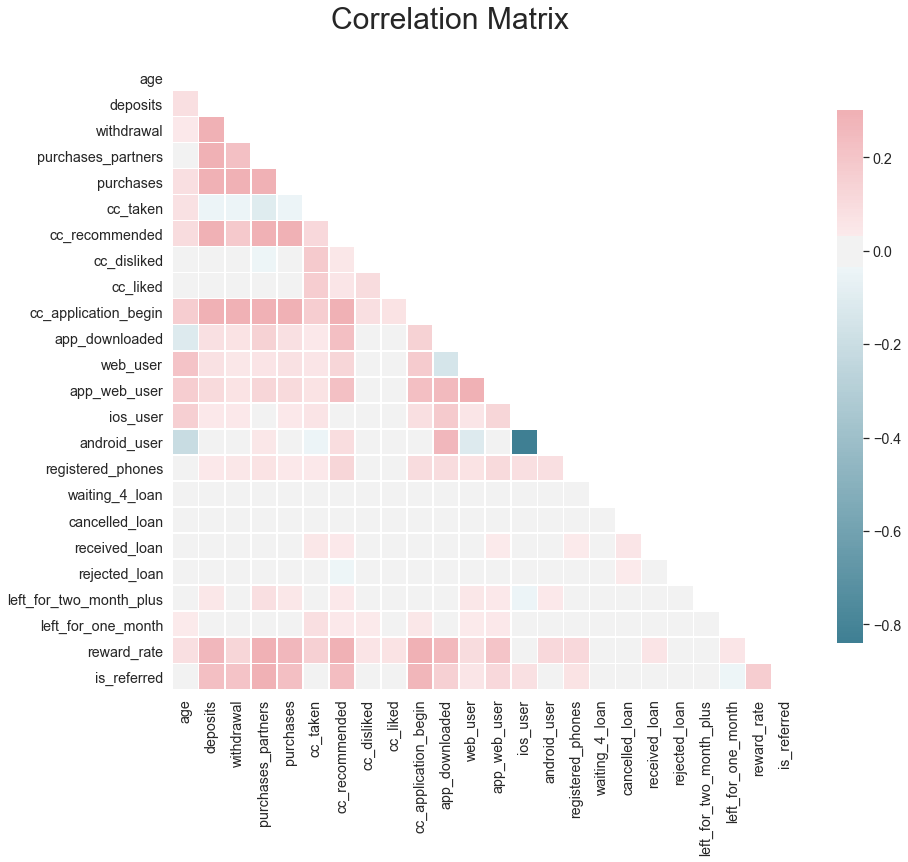

In [14]:
# Correlation Matrix
sns.set(style="white", font_scale=1.3)

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr() # do NOT want 'user'id and'churn'
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,14))
f.suptitle('Correlation Matrix', x=0.4, y=.87, fontsize = 30)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})

Here we want the independent variables to be uncorrelated to each other to reduce multi-collinearity problem. And we see a lot of square is in grey area i.e. no correlation. And some features have positive correlation but the magnitude of correlation is NOT extremely high and maximum is 0.2 which is ok. 

However, when we look at negative correlation, magnitude goes as high as -.8. This high negative correlation is present between `android_user` and `ios_user` which makes sense, if someone is android user they won't be ios user. But still it is not completely correlated as some people might have both types of phone. So we will still keep it.

`app_web_user` is not a dependent variable as it is combination of app_user and web_user so we need to remove it.

In [15]:
## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])
dataset.to_csv('new_churn_data.csv', index = False)

## Data Preparation

In [16]:
user_identifier = dataset['user']
dataset_w = dataset.drop(columns = ['user'])
dataset_w.select_dtypes(include='object').columns

Index(['housing', 'payment_type', 'zodiac_sign'], dtype='object')

These are the column that needs to be converted from categorial into binary.  `pd.get_dummies` does that but it does not remove 1 extra column that is obvious so we need to remove it after performing `pd.get_dummies()`

In [17]:
# One-Hot Encoding to convert categoricals into binary columns
dataset_we = pd.get_dummies(dataset_w)
dataset_we = dataset_we.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_we.drop(columns = 'churn'), dataset_we['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

### √ Balancing the Training Set

In [19]:
# Balancing the Training Set
print(y_train.value_counts())
print('-'*25)

filt = y_train==1 # churned
pos_index = y_train[filt].index
neg_index = y_train[~filt].index
print(len(pos_index), len(neg_index))

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

0    12656
1     8940
Name: churn, dtype: int64
-------------------------
8940 12656


Sometimes the training set could be unbalanced based on number of churned and non-churned observations present. We need to nullify that imbalance.
To do so we will randomly select indexes of higher list to match length of lower i.e. we will subset higher as big as lower. As higher will a numpy array, we will aslo convert the lower into a numpy array **[only do when large number of observations present]**

In [20]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,:]
y_train = y_train[new_indexes]
X_train.shape, y_train.shape

((17880, 41), (17880,))

In [21]:
print(y_train.value_counts())
print('-'*25)
y_test.value_counts()

1    8940
0    8940
Name: churn, dtype: int64
-------------------------


0    3166
1    2234
Name: churn, dtype: int64

We do not need to change y_test, because the training set needs to be balance.We do NOT need to change the test set distribution

## √ Feature Scaling

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# StandardScaler returns a multidimensional numpy array which loses index and column name
# So convert training sets back to pandas dataframe
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns
X_train2.index = X_train.index
X_test2.columns = X_test.columns
X_test2.index = X_test.index

X_train = X_train2
X_test = X_test2

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:459: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


## Model Building 

In [23]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6153703703703703 0.5246158670429601 0.7488809310653536 0.6170016595980085


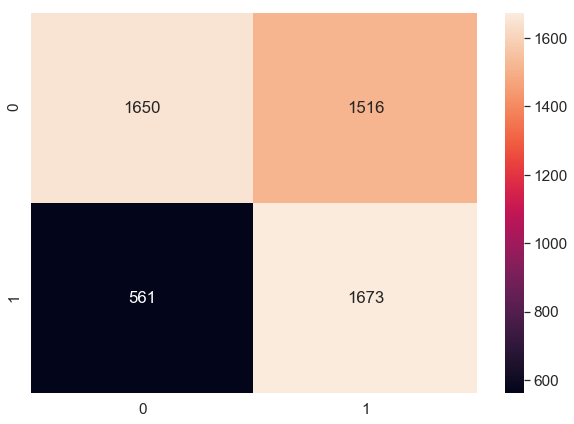

In [24]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # tp / (tp + fp) # out of all predicted +ve, how many are really +ve
recall = recall_score(y_test, y_pred) # tp / (tp + fn) # out of actual +ves, how many were predicted +ve correctly
f1 = f1_score(y_test, y_pred)
print(accuracy, precision, recall, f1)

# Visualizing model performance
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [25]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy: 0.649 (+/- 0.018)


Text(0.5,0,'Features')

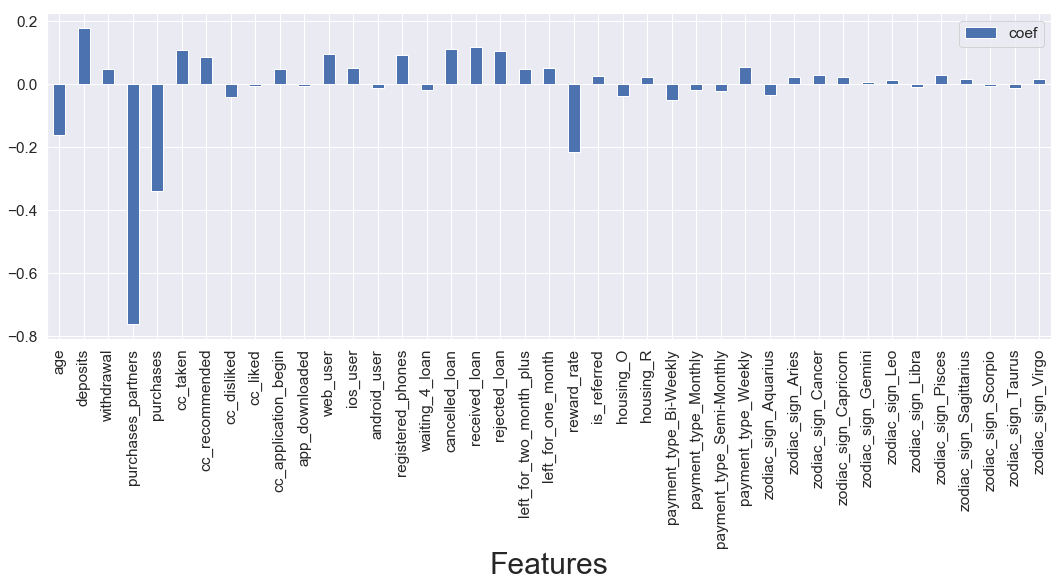

In [26]:
# Analyzing Coefficients
classifier_coef = pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
column_names = pd.DataFrame(X_train.columns, columns = ["features"])
coeff_df = pd.concat([column_names, classifier_coef],axis = 1)    

# Visualization of coefficient of different features 
fig,axis = plt.subplots(figsize=(18,6))
coeff_df[['features','coef']].plot(x='features', kind="bar", ax=axis)
axis.set_xlabel('Features', size=30)

From the coefficient values we can understand which features are important in predicting the response variable

### <span style="color:blue">** √ Feature Selection**</span>

Through this process we will reduce number of features to put in the model to achieve same accuracy

In [27]:
X_train.shape # reduce column numbers to 20

(17880, 41)

In [28]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Model to Test
classifier = LogisticRegression()

# Select Best X Features (reduce input features from 40 to 20)
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(X_train.columns[rfe.support_])
print(rfe.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Aquarius'],
      dtype='object')
[ 1  1  1  1  1  1  1  2 20  1 21  1  1 16  1 15  1  1  1  1  1  1  4  1
  5  3 11 10  1  1  9  6  8 17 14 19  7 12 22 18 13]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In ranking `1` means all 20 features that are included in the model. While `2` means the first important feature in the after top 20 feature so it is practically 21st in rank

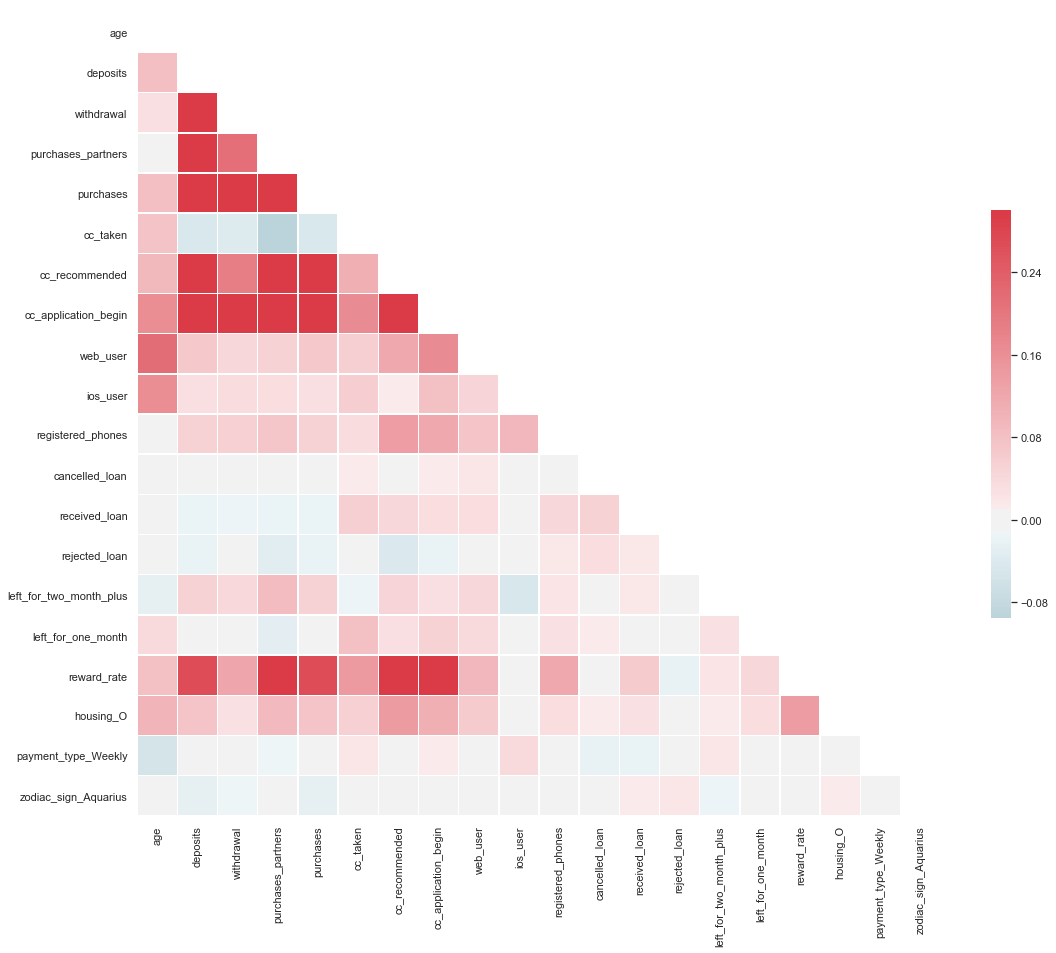

In [29]:
# New Correlation Matrix
sns.set(style="white")
cols = X_train.columns[rfe.support_]

# Compute the correlation matrix
corr = X_train[cols].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [30]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # tp / (tp + fp) # out of all predicted +ve, how many are really +ve
recall = recall_score(y_test, y_pred) # tp / (tp + fn) # out of actual +ves, how many were predicted +Ve correctly
f1 = f1_score(y_test, y_pred)
print(accuracy, precision, recall, f1)

0.6114814814814815 0.5211442786069652 0.7502238137869293 0.6150458715596331


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Data Accuracy: 0.6115


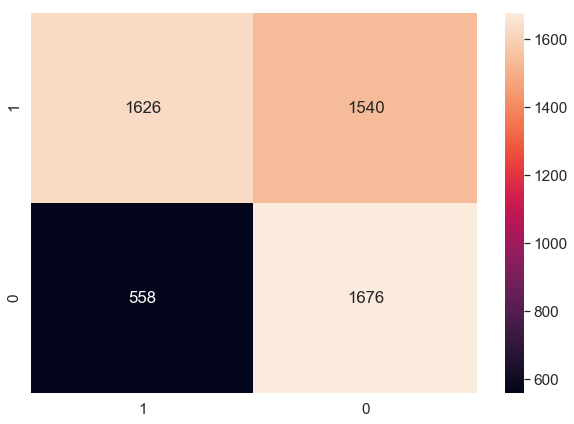

In [31]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

So all what we did here ofcourse did NOT improve the model prediction efficiency. But this is really valuable, as we removed half of the features and still the same model efficiency. So most of the predictive power (to decide who is churning out) is in the first 20 features. Thus we can remove the redundant data in this fashion.

Text(0.5,0,'Features')

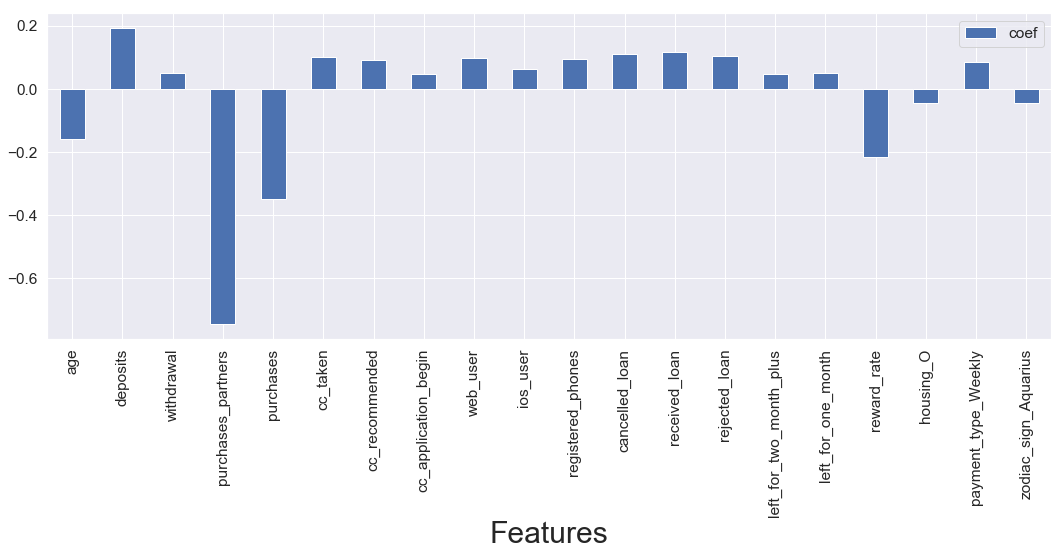

In [32]:
# Analyzing Coefficients
classifier_coef = pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
column_names = pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"])
coeff_df = pd.concat([column_names, classifier_coef],axis = 1)    

# Visualization of coefficient of different features 
fig,axis = plt.subplots(figsize=(18,6))
coeff_df[['features','coef']].plot(x='features', kind="bar", ax=axis)
axis.set_xlabel('Features', size=30)

In [33]:
# Applying k-Fold Cross Validation on only top 20 important features
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy: 0.649 (+/- 0.019)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
final_results.head()

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0


In this model, we did NOT specify (or set a limit) whether the user will churn in a week, or 6 months or a year. This makes it open ended. We should not keep time frame completely open ended. That is why, in the previous case study we imposed a 48 hours limit. However, in this case study we are mainly focused to figure out features that are decisive for the churn rate. And thus the FinTech company can be focused on those features to keep churn rate minimum.